In [31]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
firedata = pd.read_excel('/Users/folkst/Desktop/Fire_Data.15240.1598195125.4438.xlsx')

In [3]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [4]:
#คอลัมน์ใหม่ใช้สร้าง datetime
firedata['NEWTIME'] = firedata['ACQ_TIME']

In [5]:
#เติม 0 ให้เวลาที่มีไม่ครบ 4 หลัก ex 06:35
firedata['NEWTIME'] = firedata['NEWTIME'].astype(str).str.zfill(4)

In [6]:
#เติม :
firedata['NEWTIME'] = firedata['NEWTIME'].str.slice(stop=2)+':'+firedata['NEWTIME'].str.slice(start=2)

In [7]:
#เชื่อมวันและเวลา
firedata['NEWTIME'] = pd.to_datetime(firedata['ACQ_DATE'].astype(str)+' '+firedata['NEWTIME'])

In [8]:
firedata.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
NEWTIME       datetime64[ns]
dtype: object

In [17]:
#เชื่อมวันเวลาแล้ว
firedata['NEWTIME']

0       2019-12-01 06:35:00
1       2019-12-01 06:35:00
2       2019-12-01 06:35:00
3       2019-12-01 06:35:00
4       2019-12-01 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Name: NEWTIME, Length: 79234, dtype: datetime64[ns]

In [34]:
#ค่าต่างเวลาไว้พล็อตกราฟ
firedata['dif'] = firedata['NEWTIME'] - firedata['NEWTIME'].iloc[0]
firedata['datetime_numeric'] = (firedata['dif'].dt.total_seconds())/86400

In [19]:
#นับเฉพาะ 5 วัน
firedata.head(400)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,NEWTIME
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,6:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,6:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,6:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,6:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,6:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,7:01:00,N,VIIRS,n,1,298.2,2.9,0,2019-12-05 07:01:00
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,7:01:00,N,VIIRS,n,1,299.0,5.4,0,2019-12-05 07:01:00
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,284.8,0.3,0,2019-12-05 19:31:00
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,285.5,1.1,0,2019-12-05 19:31:00


In [35]:
#ตารางใหม่ใช้พล็อต
days5 = firedata[["LATITUDE","LONGITUDE","datetime_numeric"]].head(400)

In [36]:
days5

,LATITUDE,LONGITUDE,datetime_numeric
0,16.33696,98.70137,0.000000
1,16.48906,98.73961,0.000000
2,16.93571,99.06874,0.000000
3,16.54092,98.59869,0.000000
4,16.87473,98.63222,0.000000
...,...,...,...
395,18.52934,98.95547,4.018056
396,19.67583,100.26594,4.018056
397,19.52020,100.11665,4.538889
398,19.51522,100.11551,4.538889


In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

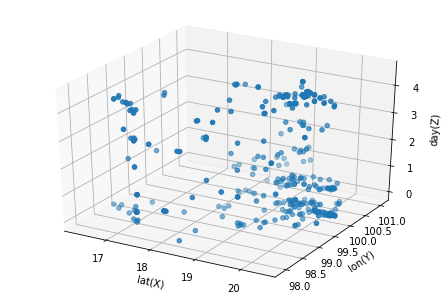

In [38]:
#พล็อตกราฟ ละติจูด ลองจิจูด ค่าต่างเวลา
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
a = Axes3D(fig)
a.scatter(days5['LATITUDE'], days5['LONGITUDE'], days5['datetime_numeric'])
a.set_xlabel('lat(X)')
a.set_ylabel('lon(Y)')
a.set_zlabel('day(Z)')
plt.show()